# TASK 1

In [3]:
pip install flair

  Using cached flair-0.10-py3-none-any.whl (322 kB)
  Using cached torch-1.10.0-cp38-cp38-win_amd64.whl (226.6 MB)
  Using cached more_itertools-8.8.0-py3-none-any.whl (48 kB)
  Using cached ftfy-6.0.3-py3-none-any.whl
  Using cached sentencepiece-0.1.95-cp38-cp38-win_amd64.whl (1.2 MB)
  Using cached gdown-3.12.2-py3-none-any.whl
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached sqlitedict-1.7.0-py3-none-any.whl
  Using cached mpld3-0.3-py3-none-any.whl
  Using cached Janome-0.4.1-py2.py3-none-any.whl (19.7 MB)
  Using cached segtok-1.5.10-py3-none-any.whl
  Using cached Wikipedia_API-0.5.4-py3-none-any.whl
  Using cached bpemb-0.3.3-py3-none-any.whl (19 kB)
  Using cached conllu-4.4.1-py2.py3-none-any.whl (15 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached gensim-4.1.2-cp38-cp38-win_amd64.whl (24.0 MB)
  Using cached konoha-4.6.5-py3-none-any.whl (20 kB)
  Using cached smart_open-5.

In [4]:
pip install --upgrade h5py

  Using cached h5py-3.6.0-cp38-cp38-win_amd64.whl (2.8 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)



In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
#import the libraries
import snscrape.modules.twitter as sntwitter
import pandas as pd, numpy as np
import pytz
from datetime import datetime
import re
pd.options.mode.chained_assignment = None  # default='warn'

In [25]:
df= pd.read_excel("Sentiment Analysis Output.xlsx")

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
analyzer.polarity_scores(df["Tweet"][1])['compound']

-0.34

In [29]:
def getPolarity(text):
    return analyzer.polarity_scores(text)['compound']

df["Polarity"]= df["Tweet"].apply(getPolarity)

df

,Datetime,Tweet,Polarity
0,2020-02-12 17:07:22,Crude Oil OPEC says Covid 19 to trim 2020 oil...,-0.7430
1,2020-02-13 03:00:19,Despite rising inventory prices climbed hi...,-0.3400
2,2020-02-13 05:27:37,Daily Highlights Trading Ideas Crude oil tra...,-0.7964
3,2020-02-13 15:00:23,OPEC EIA supply demand forecast under estimate...,-0.0516
4,2020-02-13 16:23:03,Talking crude prices and coronavirus COVID 19...,-0.3818
...,...,...,...
1847,2021-03-26 08:08:25,WTI 59 78 XOM CVX RDS BP OXY COP FA...,-0.7906
1848,2021-03-26 12:18:54,ING Crude prices retreated yesterday and set...,-0.7269
1849,2021-03-29 08:04:12,Oil traders went on a profit taking streak at ...,0.4404
1850,2021-03-30 01:15:43,Local oil companies implemented the biggest pr...,-0.7506


In [30]:
def sentiment_assign(x):
    if (x <0):
        return 'Negative'
    elif x== 0:
        return 'Neutral'
    elif x>0:
        return 'Positive'

In [31]:
df["Analysis"]= df["Polarity"].apply(sentiment_assign)

In [32]:
df["Label"]=0

In [33]:
for i in df.index:
    if df["Analysis"][i]=="Negative":
        df["Label"][i]=1
    else:
        pass

In [34]:
df

,Datetime,Tweet,Polarity,Analysis,Label
0,2020-02-12 17:07:22,Crude Oil OPEC says Covid 19 to trim 2020 oil...,-0.7430,Negative,1
1,2020-02-13 03:00:19,Despite rising inventory prices climbed hi...,-0.3400,Negative,1
2,2020-02-13 05:27:37,Daily Highlights Trading Ideas Crude oil tra...,-0.7964,Negative,1
3,2020-02-13 15:00:23,OPEC EIA supply demand forecast under estimate...,-0.0516,Negative,1
4,2020-02-13 16:23:03,Talking crude prices and coronavirus COVID 19...,-0.3818,Negative,1
...,...,...,...,...,...
1847,2021-03-26 08:08:25,WTI 59 78 XOM CVX RDS BP OXY COP FA...,-0.7906,Negative,1
1848,2021-03-26 12:18:54,ING Crude prices retreated yesterday and set...,-0.7269,Negative,1
1849,2021-03-29 08:04:12,Oil traders went on a profit taking streak at ...,0.4404,Positive,0
1850,2021-03-30 01:15:43,Local oil companies implemented the biggest pr...,-0.7506,Negative,1


In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Positive Word Cloud

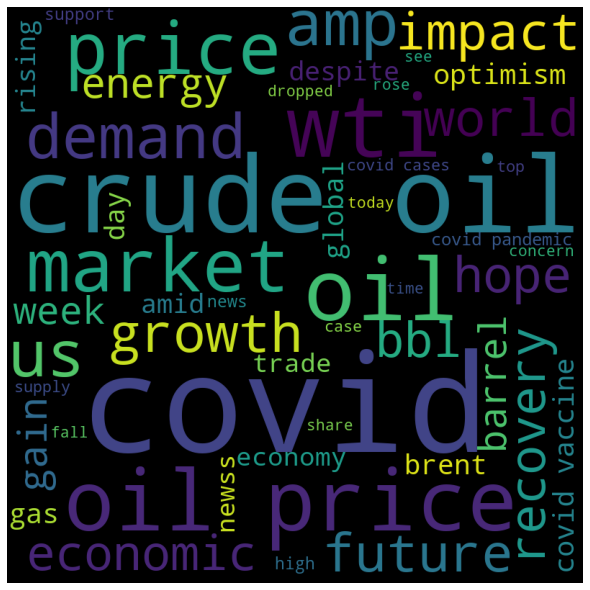

In [79]:
comment_words = ''
stopwords = list(STOPWORDS)+["s",'s',"u","will","due","said","much","back","now","new","read","t"]
 
# iterate through the csv file
for val in df[df["Analysis"]=="Positive"].Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,max_words=50,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Negative Word Cloud

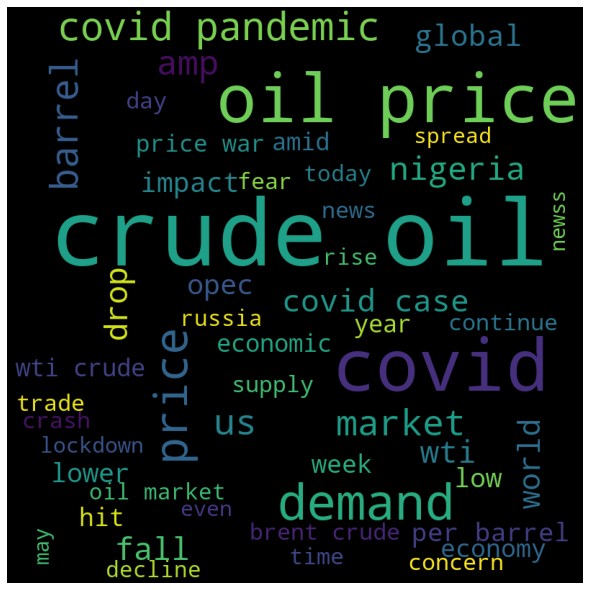

In [80]:
comment_words = ''
 
# iterate through the csv file
for val in df[df["Analysis"]=="Negative"].Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',max_words=50,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [41]:
import seaborn as sns

## Distribution Plots for Subjectivity, Polarity and Label

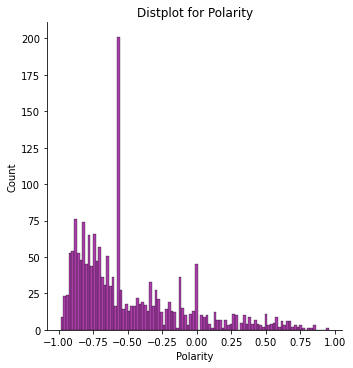

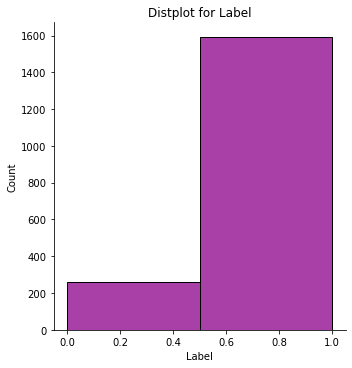

In [42]:
for col in ["Polarity","Label"]:
    if col== 'Label':
        bin_val=2
    else:
        bin_val=100
    sns.displot(x=df[col] , kde = False, color = 'darkmagenta', bins=bin_val)
    plt.title('Distplot for '+col)
    plt.show()

# Count Plot for Analysis

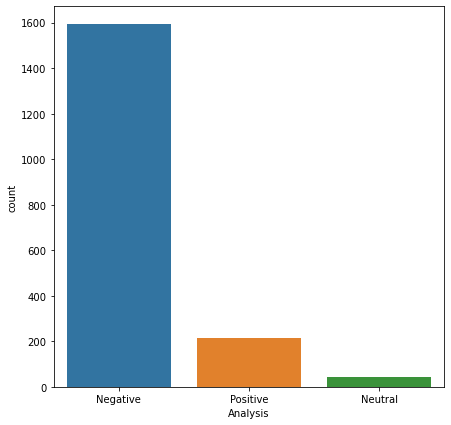

In [43]:
plt.figure(figsize=[7, 7])
sns.countplot(data=df, x="Analysis");

## Scatterplot [Date vs Polarity]

<AxesSubplot:xlabel='Datetime', ylabel='Polarity'>

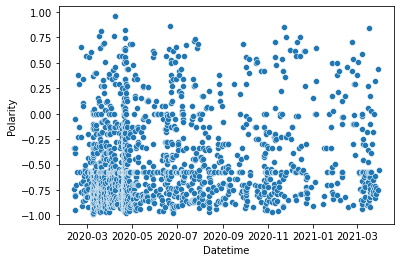

In [44]:
sns.scatterplot(data=df, x="Datetime", y="Polarity")

## Scatterplot [Date vs Analysis]

<AxesSubplot:xlabel='Datetime', ylabel='Analysis'>

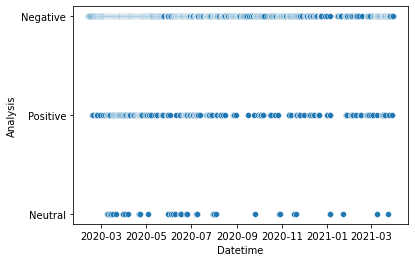

In [45]:
sns.scatterplot(data=df, x="Datetime", y="Analysis")

In [46]:
df.to_excel("Sentiment Analysis Output.xlsx", index=False)

# TASK 2

In [47]:
df= pd.read_excel("Sentiment Analysis Output.xlsx")

## Checking for Outliers

Plotting  Polarity


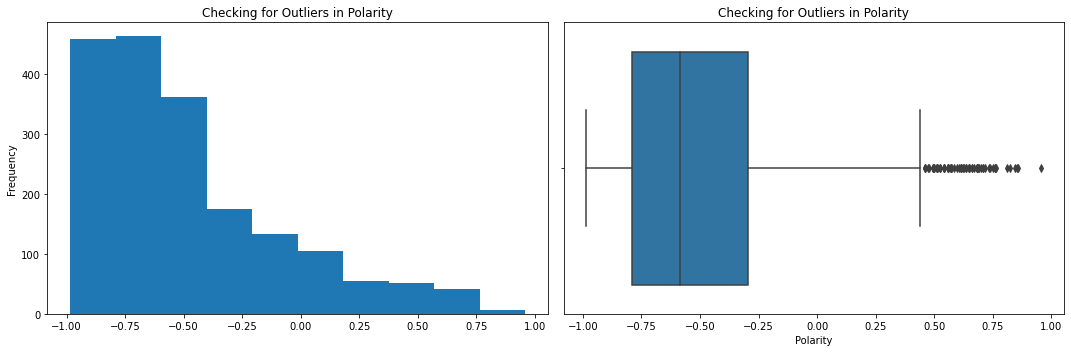

In [48]:
def data_info(df, column):
    
    fig = plt.figure(figsize=(15,5))
    
    ax1 = plt.subplot(121)
    df[column].plot.hist(ax=ax1);
    plt.title('Checking for Outliers in '+ column)
    
    ax2 = plt.subplot(122)
    sns.boxplot(x=df[column], ax=ax2);
    plt.title('Checking for Outliers in '+ column)
    
    fig.tight_layout()
    
    plt.show()
    
num_cols= ['Polarity']

for column in num_cols:
    print("Plotting ", column)
    data_info(df, column)

## Word Cloud for Dominant Words

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
m = np.array(Image.open("Twitter_new.png"))

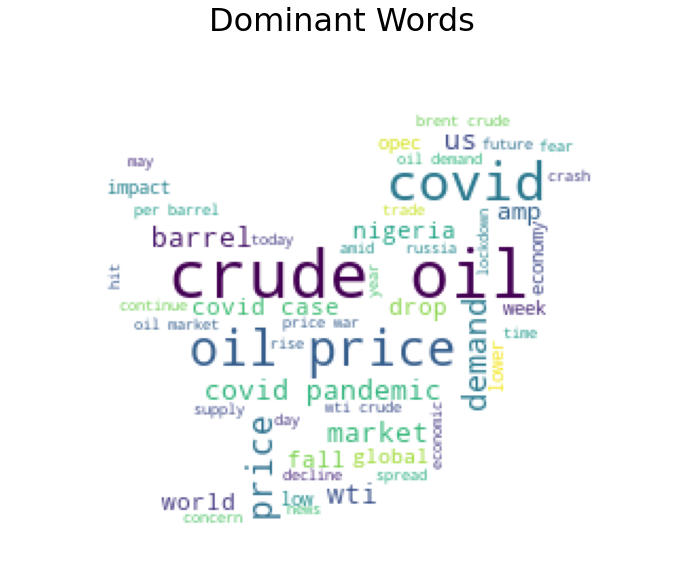

In [81]:
comment_words = ''
 
# iterate through the csv file
for val in df["Tweet"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800,stopwords=stopwords, background_color="white", max_words=50,mask=m).generate(comment_words)
# create twitter image
plt.figure(figsize = (12, 12), facecolor = None)
plt.title("Dominant Words", fontsize=32)
plt.imshow(wordcloud)
plt.axis("off")
# store to file
plt.savefig("twitter.png", format="png")
plt.show()

## Count of words

In [53]:
list_of_words= [x for x in comment_words.split(" ") if x not in stopwords]

## List and Count of Top 25 Words and Word Pairs

In [54]:
from itertools import combinations
from collections import Counter
import ast

#### Words

##### List

In [55]:
# split() returns list of all the words in the string
split_it = list_of_words
  
# Pass the split_it list to instance of Counter class.
counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = counter.most_common(25)
most_occur

[('oil', 2105),
 ('19', 1670),
 ('covid', 1662),
 ('crude', 1607),
 ('prices', 667),
 ('price', 489),
 ('demand', 453),
 ('wti', 271),
 ('barrel', 264),
 ('pandemic', 248),
 ('us', 243),
 ('global', 236),
 ('market', 202),
 ('1', 197),
 ('amp', 195),
 ('2020', 190),
 ('cases', 176),
 ('world', 145),
 ('may', 143),
 ('impact', 142),
 ('per', 131),
 ('nigeria', 131),
 ('brent', 128),
 ('amid', 127),
 ('2', 127)]

In [56]:
df_word_count= pd.DataFrame(most_occur)

In [57]:
df_word_count

,0,1
0,oil,2105
1,19,1670
2,covid,1662
3,crude,1607
4,prices,667
5,price,489
6,demand,453
7,wti,271
8,barrel,264
9,pandemic,248


###### Histogram

In [58]:
word_list = list_of_words

counts = Counter(word_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

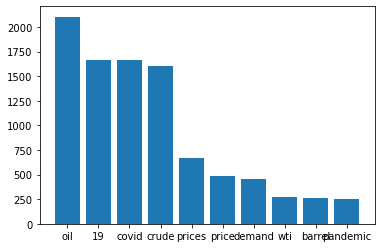

In [59]:
bar_width = 0.35

plt.bar(indexes[0:10], values[0:10])

# add labels
plt.xticks(indexes[0:10], labels[0:10])
plt.show()

#### Pair of Words

* Note that this will take a lot of time so please run it once and save the results on your system

In [60]:
# top_pair= Counter(combinations(list_of_words,2))

In [61]:
# df= pd.DataFrame.from_dict(top_pair, orient='index').reset_index()

In [62]:
# df_pair_count= df_pair_count.sort_values(0,ascending=False)

# df_pair_count= df_pair_count[0:2200].reset_index(drop=True)

# index_list= list(df_pair_count.index)

# for i in df_pair_count.index:
#     if df_pair_count["index"][i][0]== df_pair_count["index"][i][1]:
#         index_list.remove(i)

# df_pair_count= df_pair_count.iloc[index_list].reset_index(drop=True)
# df_pair_count= df_pair_count[0:2000]
# for i in df_pair_count.index:
#     df_pair_count[0][i]= round(df_pair_count[0][i]/1000)
# df_pair_count.to_excel("Top 2000 word pairs.xlsx", index=False)

In [63]:
df_pair_count= pd.read_excel("Top 2000 word pairs.xlsx")

##### List

In [64]:
df_pair_count[0:25]

,index,0
0,"('19', 'oil')",1783
1,"('covid', 'oil')",1766
2,"('crude', 'oil')",1760
3,"('oil', '19')",1734
4,"('oil', 'covid')",1734
5,"('oil', 'crude')",1627
6,"('19', 'covid')",1393
7,"('covid', '19')",1383
8,"('crude', '19')",1375
9,"('crude', 'covid')",1374


##### Histogram

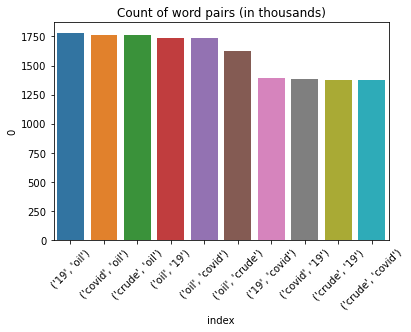

In [65]:
sns.barplot(x="index", y=0, data=df_pair_count[0:10])
plt.title("Count of word pairs (in thousands)")
plt.xticks(rotation=45)
plt.show()

## Correlation Matrix

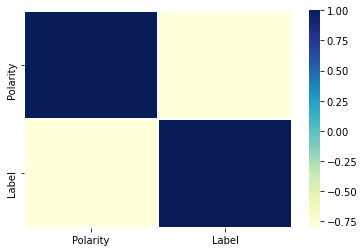

In [66]:
# To check the correlation among varibles
sns.heatmap(df.corr(),cmap="YlGnBu", linewidth=1.5)
plt.show()

## Logistic Regression Model

In [67]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Tweet'])

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Label'], random_state=42, test_size=0.25)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score

### Training and Testing the model

In [70]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [71]:
# testing
pred = model.predict(x_test)

### Calculating relevant metrics

F1 Score

In [72]:
f1_score(y_test, pred)

0.9482551143200962

Accuracy

In [73]:
accuracy_score(y_test,pred)

0.9071274298056156

Precision

In [74]:
precision_score(y_test,pred)

0.9380952380952381

### Setting cutoff probabiity as 0.3

In [75]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

F1 Score

In [76]:
f1_score(y_test, pred)

0.9494712103407756

Accuracy

In [77]:
accuracy_score(y_test,pred)

0.9071274298056156

Precision

In [78]:
precision_score(y_test,pred)

0.9181818181818182